# The Sparks Foundation

## Task 2:- Prediction using Unsupervised ML

### Problem statement: -  From the given ‘Iris’ dataset, predict the optimum number of clusters 
### and represent it visually. 


In [1]:
# Importing all libraries required in this notebook

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
dataset=pd.read_csv("C:/Users/shaye/OneDrive/Desktop/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
x=dataset[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=dataset['Species'].values

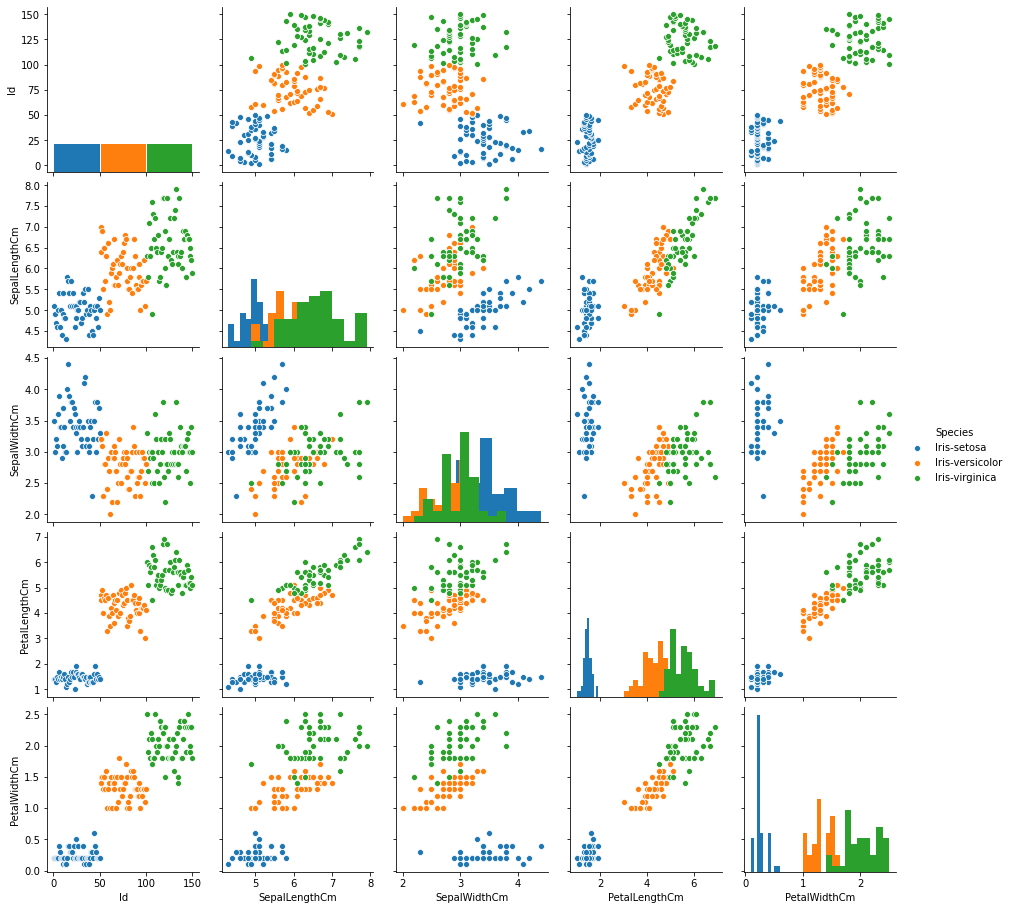

In [11]:
sns.pairplot(dataset,hue='Species',diag_kind='hist')
plt.show()

[]

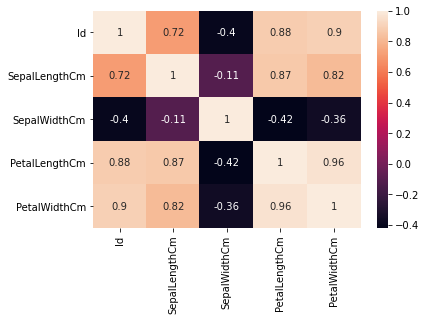

In [12]:
sns.heatmap(dataset.corr(),annot=True)
plt.plot()

### Elbow method to find the optimal number of clusters

In [13]:
from sklearn.cluster import KMeans
Range=range(1,10)
Sum_of_squared_errors=[]

In [14]:
for i in Range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    Sum_of_squared_errors.append(km.inertia_)


Text(0, 0.5, 'SSE')

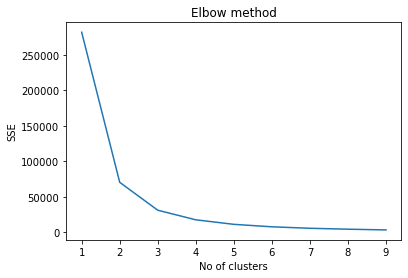

In [15]:

plt.plot(range(1, 10), Sum_of_squared_errors)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('SSE')

### From point 3 onwards, the graph becomes almost constant, so the required value of the number of the clusters from the above graph is 3.

### Therefore, optimal number of clusters = 3

### K-means clustering with number of clusters = 3

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [17]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [18]:
print(kmeans.cluster_centers_)

[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


In [19]:
predicted_clusters=kmeans.fit_predict(x)

In [20]:
predicted_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<function matplotlib.pyplot.show(*args, **kw)>

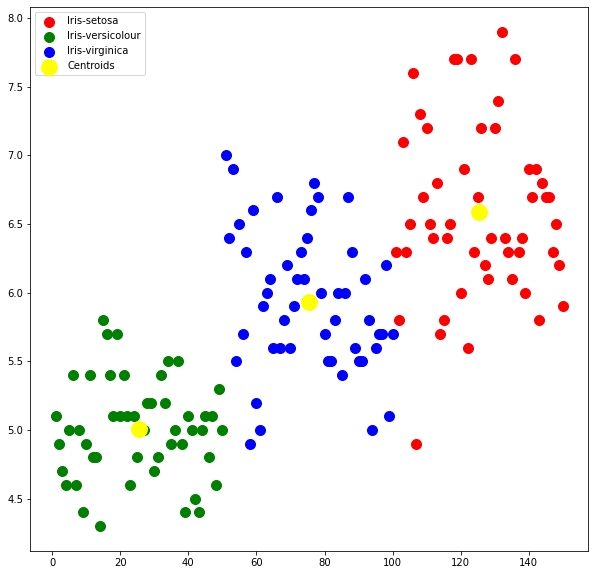

In [21]:
plt.rcParams["figure.figsize"]=10,10
plt.scatter(x[predicted_clusters==0,0],x[predicted_clusters==0,1],s=100,c='red',label='lris-setosa')
plt.scatter(x[predicted_clusters==1,0],x[predicted_clusters==1,1],s=100,c='green',label='lris-versicolour')
plt.scatter(x[predicted_clusters==2,0],x[predicted_clusters==2,1],s=100,c='blue',label='lris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,c='yellow',label='Centroids')
plt.legend()
plt.show

### This concludes the K-Means Workshop.
